# Pytorch regression _2.1_ [WorldHappinessReport.csv]

https://github.com/jcjohnson/pytorch-examples#pytorch-custom-nn-modules

In [1]:
import torch

I'm starting a GPU graphics card (which I don't have)

<span style="color:green"> Odpalam karte graficzną GPU (której nie mam)

In [2]:
device = torch.device('cpu') # obliczenia robie na CPU
#device = torch.device('cuda') # obliczenia robie na GPU

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/WorldHappinessReport.csv')
df.head(3)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

In [4]:
del df['Unnamed: 0'] 

In [5]:
df = df.dropna(how='any')

# df.fillna(-777, inplace=True)
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [6]:
print(df.dtypes)
df.head(3)

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


### Encodes text values

### <span style="color:green"> Koduje wartości tekstowe

In [7]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Region --- object


In [8]:
df['Country'] = pd.Categorical(df['Country']).codes
df['Country'] = df['Country'].astype(int)

In [9]:
df.dtypes

Country                            int64
Region                              int8
Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

### I specify what is X and what is y

### <span style="color:green"> Określam co jest X a co y

In [10]:
X = df.drop('Happiness Score',axis=1)
y =df['Happiness Score']

### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 0.0


In [12]:
y = y / 100  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

0.01 0.05


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [13]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[-1.7017,  0.6348,  1.6377, -1.4634, -2.1570, -1.1514, -1.1211, -0.3355,
          0.9371, -0.2564, -1.2157],
        [-1.6806, -1.3723,  0.3567, -0.1154, -0.5823,  0.9770, -0.3015, -0.6331,
         -0.7552, -0.3511, -1.2157],
        [-1.6595, -0.3688, -0.2395,  0.0309,  0.2762,  0.1606, -0.7774,  0.3545,
         -1.2461,  0.5988, -1.2157]], dtype=torch.float64)


In [14]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[-1.7017,  0.6348,  1.6377, -1.4634, -2.1570, -1.1514, -1.1211, -0.3355,
          0.9371, -0.2564, -1.2157],
        [-1.6806, -1.3723,  0.3567, -0.1154, -0.5823,  0.9770, -0.3015, -0.6331,
         -0.7552, -0.3511, -1.2157],
        [-1.6595, -0.3688, -0.2395,  0.0309,  0.2762,  0.1606, -0.7774,  0.3545,
         -1.2461,  0.5988, -1.2157]])


In [15]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [16]:
y = torch.tensor(y)
print(y[:3])

tensor([0.0358, 0.0496, 0.0561], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [17]:
y = y.view(y.shape[0],1)
y[:5]

tensor([[0.0358],
        [0.0496],
        [0.0561],
        [0.0403],
        [0.0657]], dtype=torch.float64)

In [18]:
y = y.type(torch.FloatTensor)

In [19]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([469, 11])
y: torch.Size([469, 1])


### Model

In [20]:
N, D_in = X.shape
N, D_out = y.shape

H = 30
device = torch.device('cpu')

In [21]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)


### MSE loss function
### <span style="color:green"> Funkcja straty MSE

In [22]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Define of learning

### <span style="color:green"> Definiowanie nauki

In [23]:
y_pred = model(X)
y_pred

tensor([[-0.1526],
        [-0.3439],
        [-0.3975],
        [-0.2317],
        [-0.4401],
        [-0.2668],
        [-0.0223],
        [-0.2127],
        [-0.3881],
        [-0.2134],
        [-0.4112],
        [-0.3404],
        [-0.3043],
        [-0.3717],
        [-0.0525],
        [-0.4185],
        [-0.0662],
        [-0.2673],
        [-0.4772],
        [-0.2909],
        [-0.2860],
        [-0.2020],
        [-0.3005],
        [-0.3350],
        [-0.0055],
        [-0.3695],
        [-0.2633],
        [-0.1647],
        [-0.3804],
        [-0.3287],
        [-0.2908],
        [-0.3196],
        [-0.3125],
        [-0.3677],
        [-0.2921],
        [-0.0965],
        [-0.3094],
        [-0.1234],
        [-0.4171],
        [-0.2318],
        [-0.4065],
        [-0.1284],
        [-0.4174],
        [-0.2584],
        [-0.3577],
        [-0.2369],
        [-0.2931],
        [-0.3045],
        [-0.4808],
        [-0.0791],
        [-0.2327],
        [-0.0714],
        [-0.

In [24]:
learning_rate = 1e-4
epochs = 2500
aggregated_losses = []

for t in range(epochs):
  
   y_pred = model(X)
            
 
   loss = loss_fn(y_pred, y) # <=# Obliczenie i wydruku straty. Mijamy Tensory zawierające przewidywane i prawdziwe
   print(t, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.
   aggregated_losses.append(loss) ## potrzebne do wykresu    
  
   model.zero_grad()    #<= # Zeruj gradienty przed uruchomieniem przejścia do tyłu. 
   

   loss.backward()      #<== Przełożenie wsteczne: oblicz gradient gradientu w odniesieniu do wszystkich możliwych do nauczenia się
                                 # parametrów modelu. Wewnętrznie parametry każdego modułu są przechowywane
                                 # w Tensorach z requires_grad=True, więc to wywołanie obliczy gradienty
                                 # wszystkich możliwych do nauczenia parametrów w modelu.
  
   with torch.no_grad():              #<== Zaktualizuj ciężary za pomocą opadania gradientu. Każdy parametr jest tensorem, więc
     for param in model.parameters():         # możemy uzyskać dostęp do jego danych i gradientów tak jak wcześniej.
       param.data -= learning_rate * param.grad

0 26.090660095214844
1 18.958703994750977
2 14.84091567993164
3 12.335232734680176
4 10.706789016723633
5 9.569379806518555
6 8.717264175415039
7 8.039191246032715
8 7.474756717681885
9 6.990269660949707
10 6.565393447875977
11 6.187349319458008
12 5.847653388977051
13 5.540458679199219
14 5.261234283447266
15 5.006471157073975
16 4.773223400115967
17 4.559011936187744
18 4.361826419830322
19 4.179885387420654
20 4.011564254760742
21 3.855548858642578
22 3.7106263637542725
23 3.5756845474243164
24 3.449726104736328
25 3.332019567489624
26 3.22182559967041
27 3.118467092514038
28 3.0213441848754883
29 2.9299230575561523
30 2.843726634979248
31 2.762328863143921
32 2.6853673458099365
33 2.6125400066375732
34 2.543473958969116
35 2.477872133255005
36 2.415475845336914
37 2.356055498123169
38 2.2993881702423096
39 2.245272636413574
40 2.1935617923736572
41 2.144099712371826
42 2.0967369079589844
43 2.051354169845581
44 2.0078213214874268
45 1.96603262424469
46 1.9258886575698853
47 1.88728

394 0.3062845766544342
395 0.3056480884552002
396 0.30501389503479004
397 0.3043820261955261
398 0.3037511706352234
399 0.30312255024909973
400 0.3024962246417999
401 0.3018720746040344
402 0.301250159740448
403 0.3006304204463959
404 0.3000127375125885
405 0.2993972897529602
406 0.2987839877605438
407 0.29817286133766174
408 0.2975638210773468
409 0.296956866979599
410 0.29635199904441833
411 0.2957492470741272
412 0.29514849185943604
413 0.2945499122142792
414 0.29395315051078796
415 0.29335838556289673
416 0.2927655577659607
417 0.29217472672462463
418 0.29158610105514526
419 0.29099971055984497
420 0.29041528701782227
421 0.28983280062675476
422 0.2892521619796753
423 0.2886736989021301
424 0.28809699416160583
425 0.2875220477581024
426 0.28694915771484375
427 0.286377876996994
428 0.2858087122440338
429 0.28524133563041687
430 0.2846757769584656
431 0.28411224484443665
432 0.2835504710674286
433 0.28299063444137573
434 0.2824324667453766
435 0.2818760871887207
436 0.28132036328315

741 0.16773486137390137
742 0.1674865484237671
743 0.16723884642124176
744 0.16699160635471344
745 0.16674499213695526
746 0.16649892926216125
747 0.16625343263149261
748 0.1660083532333374
749 0.1657639443874359
750 0.16552013158798218
751 0.16527681052684784
752 0.1650339514017105
753 0.16479171812534332
754 0.1645500361919403
755 0.16430878639221191
756 0.16406801342964172
757 0.16382789611816406
758 0.16358819603919983
759 0.16334909200668335
760 0.16311044991016388
761 0.16287240386009216
762 0.16263483464717865
763 0.1623978167772293
764 0.16216127574443817
765 0.1619252860546112
766 0.16168969869613647
767 0.16145464777946472
768 0.16122013330459595
769 0.160986065864563
770 0.16075263917446136
771 0.16051961481571198
772 0.16028709709644318
773 0.16005519032478333
774 0.1598236858844757
775 0.15959274768829346
776 0.15936222672462463
777 0.15913234651088715
778 0.15890289843082428
779 0.15867392718791962
780 0.15844550728797913
781 0.15821759402751923
782 0.15799009799957275
78

1086 0.10642184317111969
1087 0.1062961146235466
1088 0.106170654296875
1089 0.10604540258646011
1090 0.10592037439346313
1091 0.10579556226730347
1092 0.1056709960103035
1093 0.10554657876491547
1094 0.10542243719100952
1095 0.1052984818816185
1096 0.10517476499080658
1097 0.10505127161741257
1098 0.10492796450853348
1099 0.1048048809170723
1100 0.10468202829360962
1101 0.10455940663814545
1102 0.1044369637966156
1103 0.10431473702192307
1104 0.10419273376464844
1105 0.10407096892595291
1106 0.10394939035177231
1107 0.10382800549268723
1108 0.10370684415102005
1109 0.10358592867851257
1110 0.10346522182226181
1111 0.10334467142820358
1112 0.10322440415620804
1113 0.10310430079698563
1114 0.1029844656586647
1115 0.10286477208137512
1116 0.10274530947208405
1117 0.10262608528137207
1118 0.10250700265169144
1119 0.1023881733417511
1120 0.10226954519748688
1121 0.10215107351541519
1122 0.10203279554843903
1123 0.1019146591424942
1124 0.1017967090010643
1125 0.10167896002531052
1126 0.1015

1428 0.07354751974344254
1429 0.07347480952739716
1430 0.07340215891599655
1431 0.07332965731620789
1432 0.07325726747512817
1433 0.07318497449159622
1434 0.07311275601387024
1435 0.0730406641960144
1436 0.07296869903802872
1437 0.072896808385849
1438 0.07282502204179764
1439 0.07275337725877762
1440 0.07268179208040237
1441 0.07261036336421967
1442 0.07253900915384293
1443 0.07246775925159454
1444 0.07239660620689392
1445 0.07232558727264404
1446 0.07225462794303894
1447 0.07218383997678757
1448 0.07211309671401978
1449 0.07204247266054153
1450 0.07197195291519165
1451 0.07190153002738953
1452 0.07183121144771576
1453 0.07176101207733154
1454 0.07169090956449509
1455 0.0716208890080452
1456 0.07155098021030426
1457 0.07148120552301407
1458 0.07141148298978806
1459 0.071341872215271
1460 0.0712723508477211
1461 0.07120297849178314
1462 0.07113366574048996
1463 0.07106447964906693
1464 0.07099536806344986
1465 0.07092636078596115
1466 0.0708574652671814
1467 0.07078867405653
1468 0.0707

1766 0.053933899849653244
1767 0.05388794466853142
1768 0.053842052817344666
1769 0.05379622429609299
1770 0.05375047028064728
1771 0.053704772144556046
1772 0.0536591075360775
1773 0.05361352860927582
1774 0.05356798693537712
1775 0.053522516041994095
1776 0.05347709730267525
1777 0.053431738168001175
1778 0.05338643863797188
1779 0.053341202437877655
1780 0.05329599231481552
1781 0.053250860422849655
1782 0.05320577323436737
1783 0.05316077172756195
1784 0.05311578884720802
1785 0.05307089164853096
1786 0.053026050329208374
1787 0.05298124998807907
1788 0.05293651297688484
1789 0.052891843020915985
1790 0.052847232669591904
1791 0.052802663296461105
1792 0.052758198231458664
1793 0.05271377041935921
1794 0.05266939103603363
1795 0.052625082433223724
1796 0.05258084461092949
1797 0.052536748349666595
1798 0.05249271169304848
1799 0.05244872346520424
1800 0.05240481346845627
1801 0.052360936999320984
1802 0.05231712758541107
1803 0.05227334797382355
1804 0.052229635417461395
1805 0.052

2118 0.040793124586343765
2119 0.04076285660266876
2120 0.04073262959718704
2121 0.04070243984460831
2122 0.040672264993190765
2123 0.0406421422958374
2124 0.04061204940080643
2125 0.04058198258280754
2126 0.04055195301771164
2127 0.040521953254938126
2128 0.040491994470357895
2129 0.040462054312229156
2130 0.0404321551322937
2131 0.04040230065584183
2132 0.04037246108055115
2133 0.04034265875816345
2134 0.04031289741396904
2135 0.04028316214680672
2136 0.04025344178080559
2137 0.040223777294158936
2138 0.04019414633512497
2139 0.0401645191013813
2140 0.04013495519757271
2141 0.0401054210960865
2142 0.04007590562105179
2143 0.04004641994833946
2144 0.040016982704401016
2145 0.03998757526278496
2146 0.039958178997039795
2147 0.03992884233593941
2148 0.03989951312541962
2149 0.039870236068964005
2150 0.03984097018837929
2151 0.03981175646185875
2152 0.0397825762629509
2153 0.03975340723991394
2154 0.039724282920360565
2155 0.039695192128419876
2156 0.039666127413511276
2157 0.03963709622

2488 0.03151242807507515
2489 0.03149174153804779
2490 0.03147107735276222
2491 0.03145042434334755
2492 0.03142978996038437
2493 0.03140917792916298
2494 0.03138859570026398
2495 0.03136802464723587
2496 0.031347475945949554
2497 0.031326938420534134
2498 0.0313064269721508
2499 0.031285934150218964


In [25]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 
    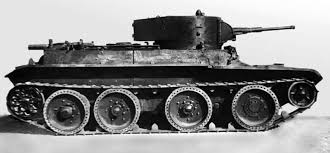

In [26]:
with torch.no_grad():
    y_pred = model(X)  
    loss = (y_pred - y).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.03126546


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [27]:
y_pred[:5]

tensor([[0.0312],
        [0.0491],
        [0.0556],
        [0.0296],
        [0.0629]])

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [28]:
torch.save(model,'/home/wojciech/Pulpit/7/byk12.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model

In [29]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk12.pb')
KOT.eval()

Sequential(
  (0): Linear(in_features=11, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

In [30]:
X_exp = X[85] 
X_exp

tensor([ 0.1112,  0.9693,  1.1518, -2.1961, -1.8163, -1.4758,  0.1856, -0.5823,
         0.6798,  1.2684, -1.2157])

In [31]:
y_exp = y[85]
y_exp

tensor([0.0429])

In [32]:
y_pred_exp = model(X_exp)
y_pred_exp

tensor([0.0543], grad_fn=<AddBackward0>)

In [33]:
y_pred*100

tensor([[3.1173],
        [4.9074],
        [5.5573],
        [2.9593],
        [6.2936],
        [4.6174],
        [7.5549],
        [7.5266],
        [4.4734],
        [6.3947],
        [5.9618],
        [5.7750],
        [7.8213],
        [4.9128],
        [6.3496],
        [5.8711],
        [5.2894],
        [3.7397],
        [6.4148],
        [3.4340],
        [3.3972],
        [4.3185],
        [3.6045],
        [3.0177],
        [7.3721],
        [5.1412],
        [2.8095],
        [5.8450],
        [5.4262],
        [6.3144],
        [3.9237],
        [3.1936],
        [2.9475],
        [6.3968],
        [5.6966],
        [6.1143],
        [6.0741],
        [8.3605],
        [3.3952],
        [5.1286],
        [6.3835],
        [4.1646],
        [6.1210],
        [4.9784],
        [4.2023],
        [8.6686],
        [7.7293],
        [2.7385],
        [4.2589],
        [7.8235],
        [4.8055],
        [7.5355],
        [5.3037],
        [3.8050],
        [4.5638],
        [5

In [34]:
df.loc[85,'Happiness Score']

5.007

In [35]:
(y_exp - y_pred_exp).pow(2).sum()

tensor(0.0001, grad_fn=<SumBackward0>)

### r2_score_compute
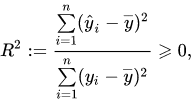

In [36]:
def r2_score_compute_fn(y_pred, y):
    e = torch.sum((y_pred-y.mean()) ** 2) / torch.sum((y - y.mean()) ** 2)
    return 1 - e.item()


In [37]:
r2_score_compute_fn(y, y_pred)

0.3201408386230469

In [38]:
a = pd.DataFrame(y)
b = pd.DataFrame(y_pred)